# **DATA CLEANING**

In [ ]:
import pandas as pd

In [ ]:
#baca data dari file CSV
file_path = "/content/drive/MyDrive/COLLEGE/SEMESTER 6/MACHINE LEARNING/TB 2_ML/Student Mental health.csv"
data = pd.read_csv(file_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
df = pd.DataFrame(data)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

(101, 11)

In [ ]:
count_values = df.stack().value_counts()
print("\nJumlah kemunculan setiap nilai unik dalam seluruh DataFrame:")
print(count_values)


Jumlah kemunculan setiap nilai unik dalam seluruh DataFrame:
No                         381
Yes                        124
Female                      75
3.50 - 4.00                 47
3.00 - 3.49                 43
                          ... 
Business Administration      1
8/7/2020 14:27               1
8/7/2020 14:05               1
8/7/2020 13:58               1
18/07/2020 20:16:21          1
Length: 165, dtype: int64


In [ ]:
df = pd.DataFrame(data)
df.rename(columns=
          {"Timestamp" : "timestamp",
           "Choose your gender" : "gender",
           "Age" : "age",
           "What is your course?" : "course",
           "Your current year of Study" : "year_study",
           "What is your CGPA?" : "cgpa",
           "Marital status" : "marital",
           "Do you have Depression?" : "depression",
           "Do you have Anxiety?" : "anxiety",
           "Do you have Panic attack?" : "panic_attack",
           "Did you seek any specialist for a treatment?" : "treatment"}, inplace=True)

df.head()

,timestamp,gender,age,course,year_study,cgpa,marital,depression,anxiety,panic_attack,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
df.duplicated().sum()

0

In [ ]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace=True)

In [ ]:
df['year_study'] = df['year_study'].str.lower()

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

timestamp       0
gender          0
age             0
course          0
year_study      0
cgpa            0
marital         0
depression      0
anxiety         0
panic_attack    0
treatment       0
dtype: int64


In [ ]:
df.drop(columns=["timestamp"], inplace = True)

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        101 non-null    object 
 1   age           101 non-null    float64
 2   course        101 non-null    object 
 3   year_study    101 non-null    object 
 4   cgpa          101 non-null    object 
 5   marital       101 non-null    object 
 6   depression    101 non-null    object 
 7   anxiety       101 non-null    object 
 8   panic_attack  101 non-null    object 
 9   treatment     101 non-null    object 
dtypes: float64(1), object(9)
memory usage: 8.0+ KB


(101, 10)

# **EDA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

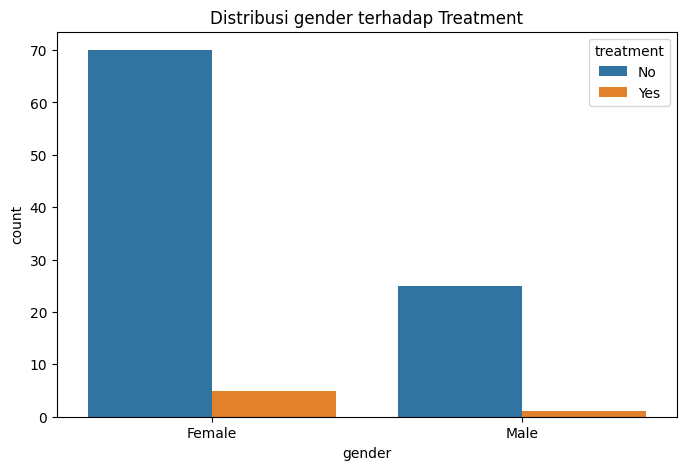

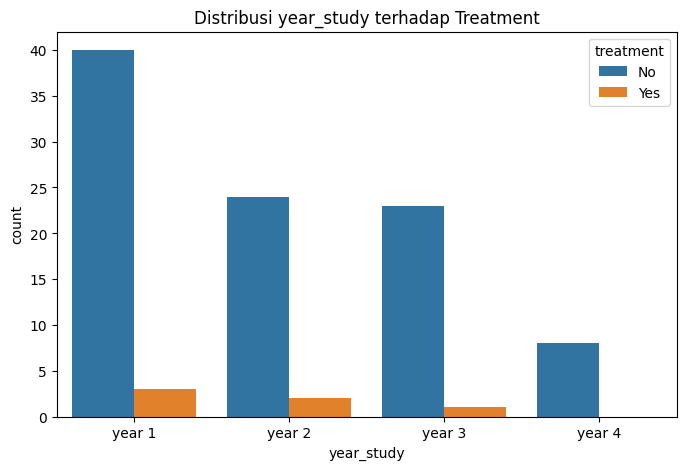

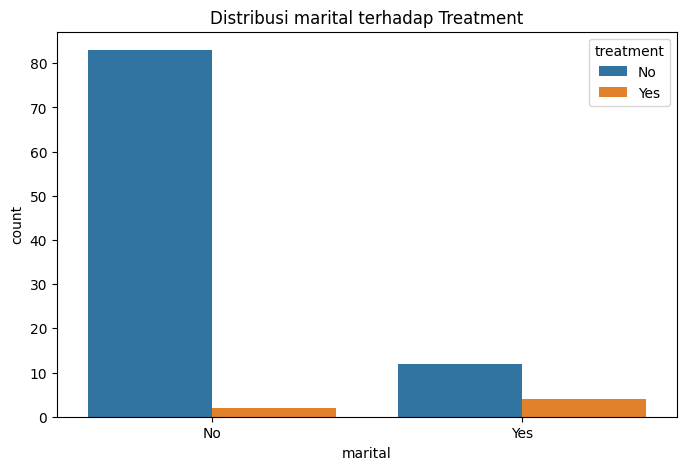

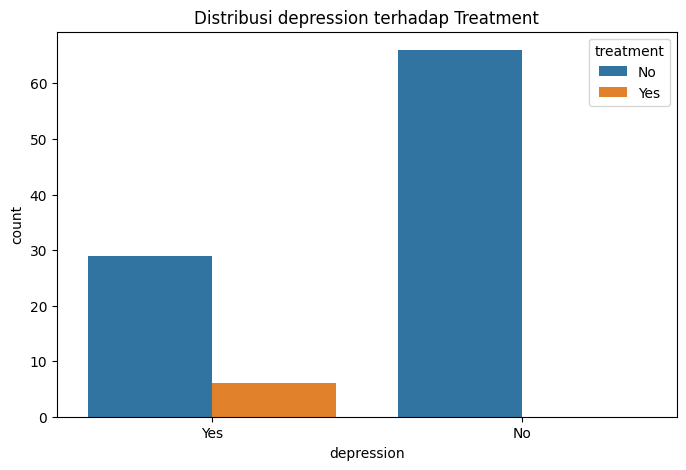

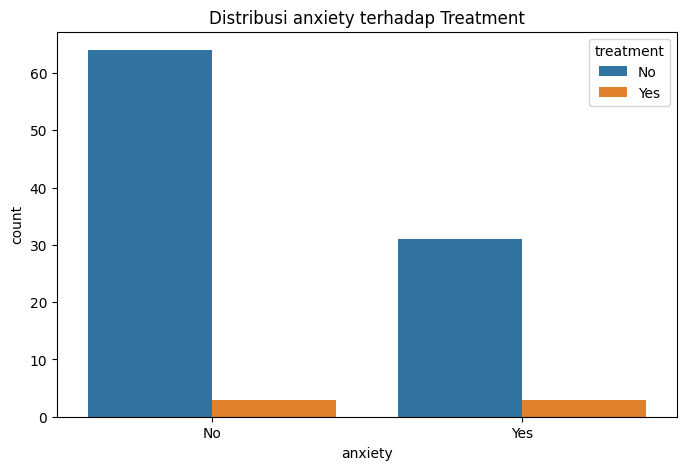

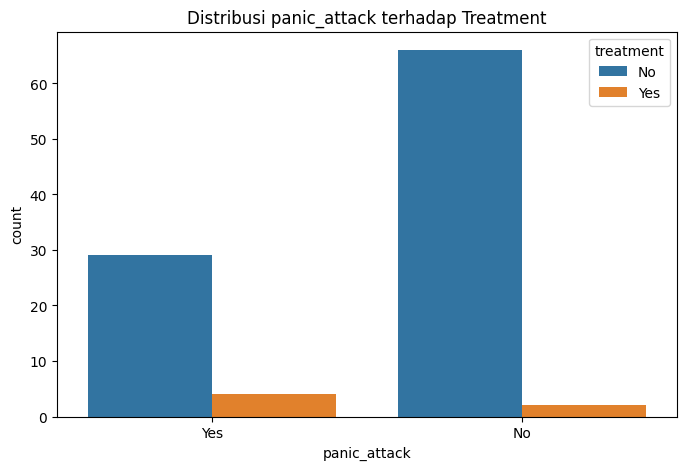

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi fitur kategorikal terhadap treatment
categorical_features = ['gender', 'year_study', 'marital', 'depression', 'anxiety', 'panic_attack']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='treatment', data=df)
    plt.title(f'Distribusi {feature} terhadap Treatment')
    plt.show()
    print("\n")

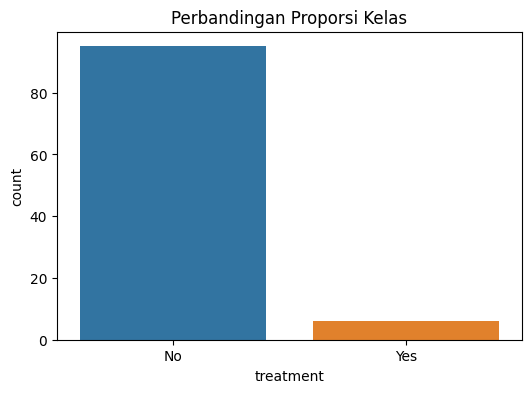

In [ ]:
# Visualisasi perbandingan kelas
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df)
plt.title('Perbandingan Proporsi Kelas')
plt.show()

In [ ]:
# Menghitung perbandingan kelas
proporsi_kelas = df['treatment'].value_counts(normalize=True)
print("Perbandingan Proporsi Kelas:")
print(proporsi_kelas)

Perbandingan Proporsi Kelas:
No     0.940594
Yes    0.059406
Name: treatment, dtype: float64


In [ ]:
# Menampilkan informasi perbandingan kelas
if len(proporsi_kelas) == 2:
    ratio = proporsi_kelas['Yes'] / proporsi_kelas['No']
    print(f"Perbandingan Kelas 'Yes' terhadap 'No': {ratio:.2f}")
else:
    print("Hanya satu kelas yang ada.")

Perbandingan Kelas 'Yes' terhadap 'No': 0.06


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Misalnya, df adalah DataFrame kamu yang berisi seluruh kolom termasuk label 'treatment'

# Menangani variabel kategorikal dengan one-hot encoding
X_encoded = pd.get_dummies(X, columns=['gender', 'age', 'course', 'year_study', 'cgpa', 'marital', 'depression', 'anxiety', 'panic_attack'], drop_first=True)

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier()

# Menentukan target variabel
target_variable = 'treatment'
y = df[target_variable]

# Melatih model
model.fit(X_encoded, y)

# Mendapatkan feature importance
feature_importance = model.feature_importances_

# Menyusun data menjadi DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importance})

# Tampilkan DataFrame feature importance
print(feature_importance_df)


              Feature  Importance
0         gender_Male    0.043516
1            age_19.0    0.033522
2            age_20.0    0.004013
3           age_20.53    0.000017
4            age_21.0    0.001267
..                ...         ...
63  cgpa_3.50 - 4.00     0.009925
64        marital_Yes    0.086336
65     depression_Yes    0.123019
66        anxiety_Yes    0.059134
67   panic_attack_Yes    0.087892

[68 rows x 2 columns]


# **DATA PREPROCESSING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Misalnya, df adalah DataFrame kamu yang berisi seluruh kolom termasuk label 'treatment'

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui seluruh kolom dalam DataFrame
for column in df.columns:
    # Cek apakah tipe data kolom adalah object (string)
    if df[column].dtype == 'object':
        # Melakukan label encoding pada kolom
        df[column] = label_encoder.fit_transform(df[column])

# Tampilkan DataFrame setelah label encoding
print(df.head())

   gender   age  course  year_study  cgpa  marital  depression  anxiety  \
0       0  18.0      17           0     3        0           1        0   
1       1  21.0      25           1     3        0           0        1   
2       1  19.0       4           0     3        0           1        1   
3       0  22.0      33           2     3        1           1        0   
4       1  23.0      37           3     3        0           0        0   

   panic_attack  treatment  
0             1          0  
1             0          0  
2             1          0  
3             0          0  
4             0          0  


In [ ]:
import pandas as pd

# Misalnya, df adalah DataFrame kamu yang berisi seluruh kolom termasuk label 'treatment'

# Pisahkan fitur dan label
X = df.drop('treatment', axis=1)
y = df['treatment']

# Menggunakan one-hot encoding untuk variabel kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)

# Gabungkan kembali dengan label
df_encoded = pd.concat([X_encoded, y], axis=1)

# Tampilkan DataFrame yang sudah diencode
print(df_encoded.head())


   gender   age  course  year_study  cgpa  marital  depression  anxiety  \
0       0  18.0      17           0     3        0           1        0   
1       1  21.0      25           1     3        0           0        1   
2       1  19.0       4           0     3        0           1        1   
3       0  22.0      33           2     3        1           1        0   
4       1  23.0      37           3     3        0           0        0   

   panic_attack  treatment  
0             1          0  
1             0          0  
2             1          0  
3             0          0  
4             0          0  


        Feature  Importance
0        gender    0.026654
1           age    0.106404
2        course    0.305995
3    year_study    0.076351
4          cgpa    0.142034
5       marital    0.111548
6    depression    0.094582
7       anxiety    0.051899
8  panic_attack    0.084535


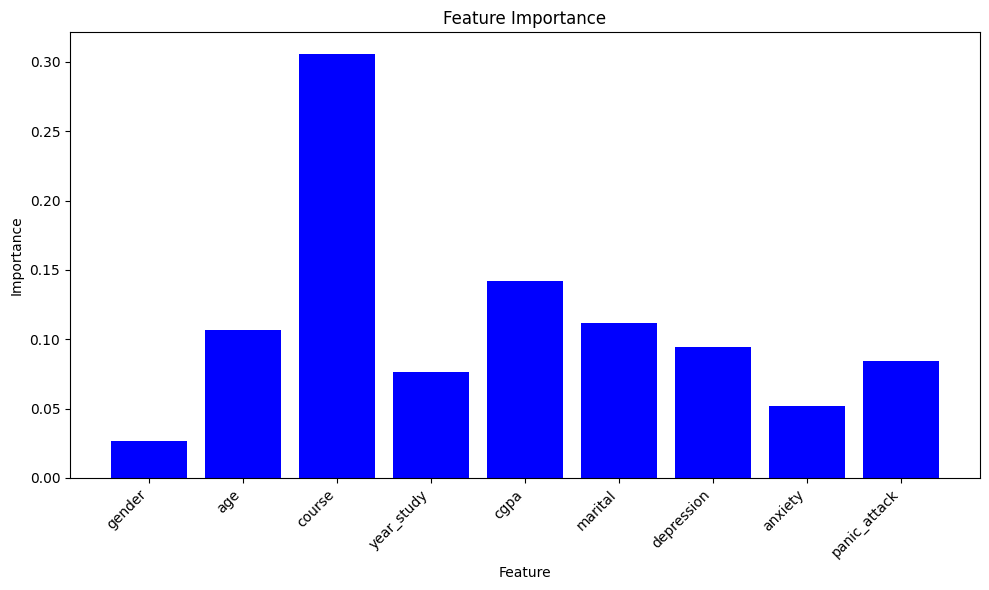

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Pisahkan fitur dan label
X = df.drop('treatment', axis=1)
y = df['treatment']

# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier()

# Melatih model
model.fit(X, y)

# Mendapatkan feature importance
feature_importance = model.feature_importances_

# Menyusun data menjadi DataFrame untuk memudahkan analisis
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Tampilkan DataFrame feature importance
print(feature_importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()

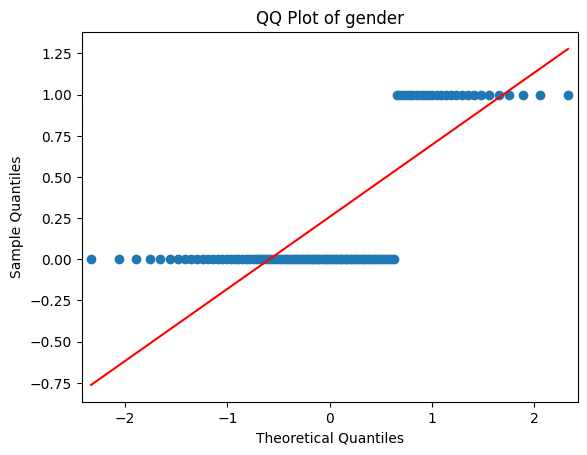

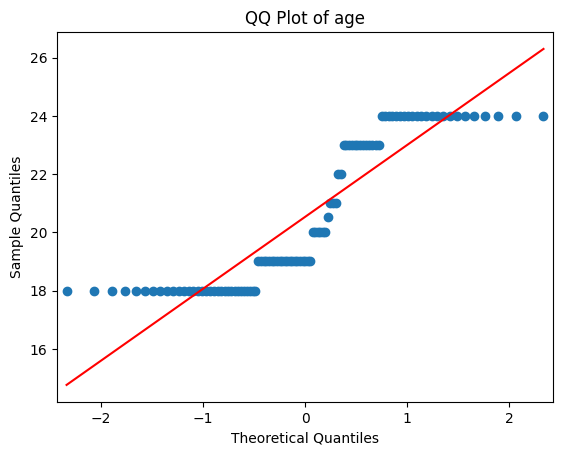

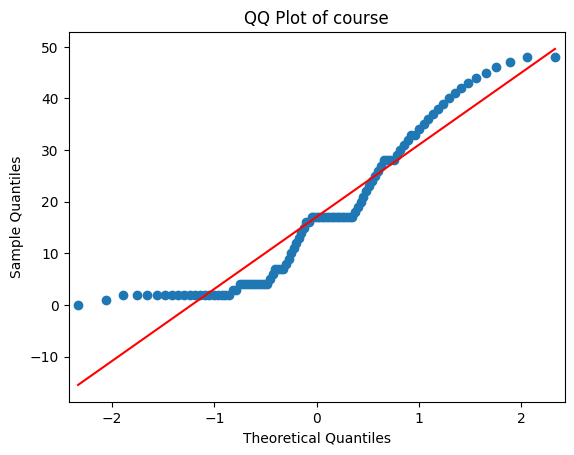

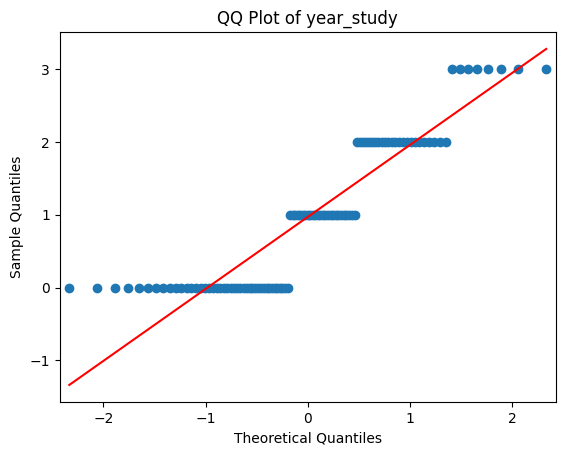

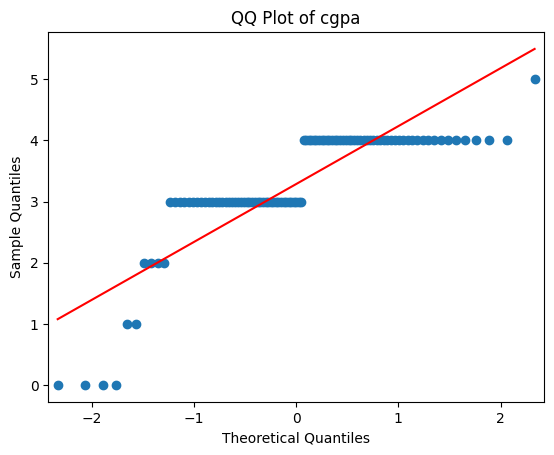

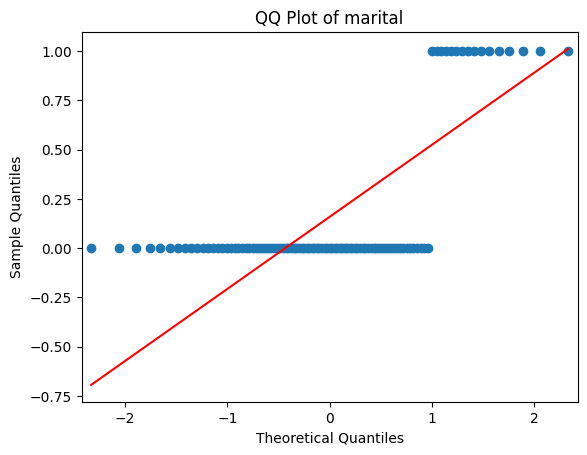

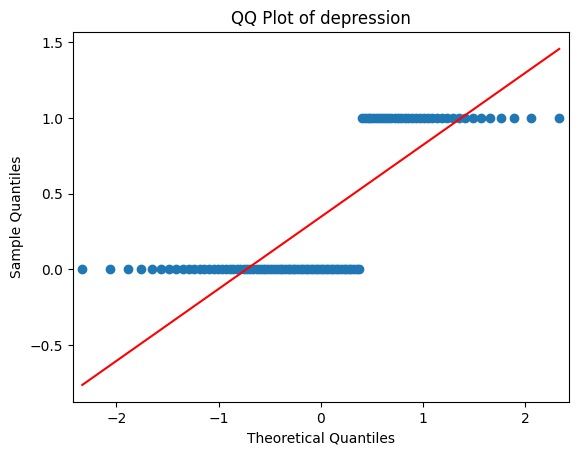

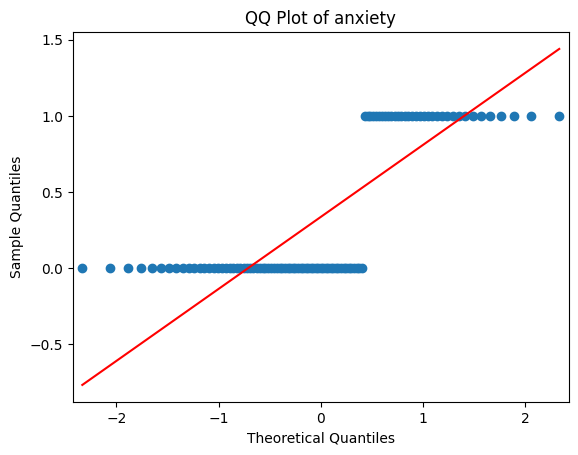

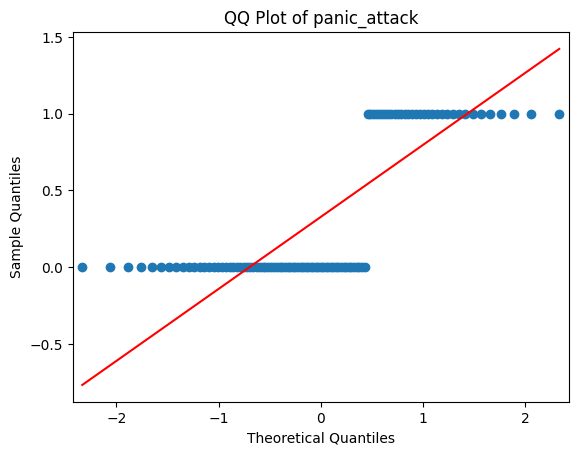

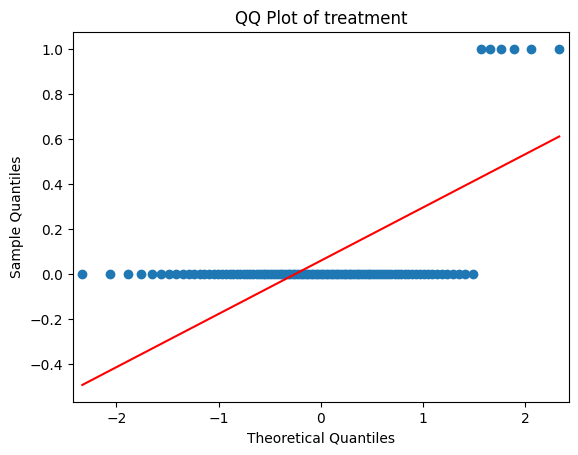

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Misalnya, df adalah DataFrame kamu
for column in df.columns:
    sm.qqplot(df[column], line='s')
    plt.title(f'QQ Plot of {column}')
    plt.show()
    print("\n")

# **DATA MODELLING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalnya, df adalah DataFrame kamu
X = df.drop('treatment', axis=1)
y = df['treatment']

# Bagi data menjadi data latih dan uji (proporsi 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Inisialisasi model SVM
svm_model = SVC()

# Melatih model SVM
svm_model.fit(X_train_normalized, y_train)

# Prediksi menggunakan data uji
y_pred = svm_model.predict(X_test_normalized)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9047619047619048
Confusion Matrix:
[[19  0]
 [ 2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Setelah ditambahkan kfold**

In [79]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
import numpy as np

# Misalnya, df adalah DataFrame kamu
X = df.drop('treatment', axis=1)
y = df['treatment']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Inisialisasi model SVM
svm_model = SVC()

# Melakukan K-Fold Cross Validation dengan prediksi
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(svm_model, X_normalized, y, cv=cv)

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Hitung Precision dan Recall
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
accuracy_scores = cross_val_score(svm_model, X_normalized, y, cv=cv, scoring='accuracy')

# Tampilkan hasil K-Fold Cross Validation
print(f'Accuracy Scores: {accuracy_scores}')
print(f'Mean Accuracy: {np.mean(accuracy_scores)}')
print(f'Standard Deviation of Accuracy: {np.std(accuracy_scores)}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Hitung Classification Report
classification_rep = classification_report(y, y_pred)
print(f'Classification Report:\n{classification_rep}')

Confusion Matrix:
[[95  0]
 [ 6  0]]
Accuracy Scores: [0.9047619 0.95      0.95      0.95      0.95     ]
Mean Accuracy: 0.940952380952381
Standard Deviation of Accuracy: 0.018095238095238077
Precision: 0.0
Recall: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        95
           1       0.00      0.00      0.00         6

    accuracy                           0.94       101
   macro avg       0.47      0.50      0.48       101
weighted avg       0.88      0.94      0.91       101



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Unde